<a href="https://colab.research.google.com/github/Saz1978/DFE5/blob/main/MachineLearningProjectSaraAllsopp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


### Q. Define the problem domain

I have chosen to use the healthcare_dataset_stroke_data file from kaggle.  The data is used to predict whether someone is likely to have a stroke based on various factors, including their bmi, gender, age and various diseases. Each row in the dataset contains information about a particular patient. 

I have chosen this because:
1. The use of Machine Learning in the healthcare sector is an area that particularly interests me as it appears to be something that makes a really positive difference to early diagnosis of diseases and therefore potentially  improves recovery rates. 
2. Comments about this dataset on Kaggle suggest that it's a highly rated dataset.
3. It's not a huge dataset so this is less intimidating for me as a beginner with ML.
4. Unlike some of the other datasets I have looked at, the column headings are very clear and therefore it's much easier to see what data is represented in each column. 

I am going to approach this problem in 2 ways:
1. I will do the whole lot in this notebook using Python and then save the file at the end in pkl format and create a model in Azure just for the deployment.
2. After cleaning the data in this notebook, I will then save the file as a csv, import as a dataset into Azure and create a ML pipeline using the designer option in Azure Machine Studio. 
I will record results from both of these within this notebook. 

In [54]:
import pandas as pd
import numpy as np

I will get my data (which I have downloaded from Kaggle and saved in my GitHub) and then display the first 5 rows so that I can have a look at my data. 

In [55]:
data = pd.read_csv("https://raw.githubusercontent.com/Saz1978/Pandas-Exercises/main/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Q. Identify candidate questions for your machine learning project

I would like to look at how specific factors impact on the likelihood of having a stroke; in particular someone's BMI, previous heart disease and average glucose level.

### Q. Generate a descriptive statistics report for the columns in your dataset

In [56]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [57]:
correlations = data.corr() 
correlations 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


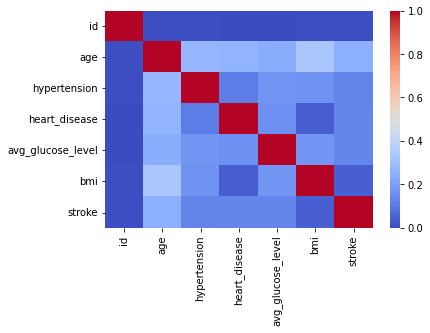

In [58]:
import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


I can see from the above information that there are null values in the BMI column so will check to see how many of these there are.


In [60]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

So I can see from this that there are 201 null values. As this is under 4% of the values in that column, I will just delete the rows with null values rather than deleting the whole column.

In [61]:
data = data.dropna()


To check whether that has worked properly, I'll get the information again

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


This shows that all columns now have the same number of rows, so there shouldn't be any missing values. 

I'm now going to save this cleaned data as a csv file so that I can use it in Azure.

In [63]:
data.to_csv("cleanedstrokedata")

From looking at the statistical information, I can see that it's going to be much more straightforward to concentrate on the numerical data, therefore at this point I will go ahead and drop the non-numerical columns. 

In [68]:
data = data.drop(['gender', 'ever_married','work_type','Residence_type','smoking_status'], axis = 1)


I'll now check that the only columns I have left have either float or integer datatypes

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   avg_glucose_level  4909 non-null   float64
 5   bmi                4909 non-null   float64
 6   stroke             4909 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 306.8 KB


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

As mentioned above, the only column with null values was the BMI column so that made it relatively easy to deal with.  
I would class these as missing at random as they are not significantly different to the values that are available. 

Now I've gotten rid of null values and dropped non-numerical columns, I will split my data into training and testing and then normalise by finding the z-score.

In [72]:
y = data.loc [:, 'stroke']
x = data.iloc [:, :-1]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split (x,y, test_size = 0.2)

stats = xtrain.describe().T
stats

zmean = stats ['mean']
zstd = stats ['std']

norm_xtrain = (xtrain -zmean)/zstd
norm_xtest = (xtest - zmean)/zstd

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

Mine is a classification problem and I've chosen two different algorithms for this.

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(norm_xtrain, ytrain)

RandomForestClassifier()

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(norm_xtrain, ytrain)

KNeighborsClassifier()

In [74]:
ypred = model.predict(norm_xtest)

In [75]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

Classification metrics from the work here in Python:


In [85]:
from sklearn.metrics import accuracy_score
accuracy_method1 = accuracy_score(ypred, ytest)
accuracy_method1

0.9501018329938901

In [86]:
from sklearn.model_selection import cross_val_score
cv_method1 = cross_val_score(model, norm_xtrain, ytrain, cv=5)
cv_method1

array([0.95928753, 0.95928753, 0.95923567, 0.95923567, 0.95923567])

Metrics from the Training Pipeline run in Azure (where I chose the Multiclass Decision Forest algorithm):
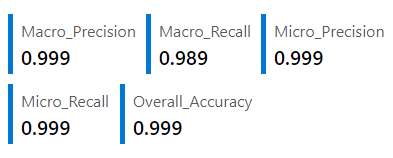

It's clear from this that the accuracy was higher with the Azure Machine Learning Pipeline model.  I did use a different algorithm here but I also didn't normalise the data, like I did within this notebook before using the RandomForest and KNeighbors classifiers, so would guess that this may have had an impact. 

# Part 5: Stretch - Model Deployment

Now this is completed, I will save as a PKL file and then use to import and deploy a model in Azure.

In [90]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [91]:
import sklearn
print(sklearn.__version__)

1.0.2


Here is the code from the completed deployment in Azure after saving this notebook as a PKL file:

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://30e93404-8b91-4ff1-9298-a832f15cc1c8.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

Here is the completed code from the deployment in Azure using the Machine Learning Pipeline Designer (following on from importing the csv file after I'd cleaned the data in this notebook):

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
        "WebServiceInput0":
        [
            {
                'Column1': "0",
                'id': "9046",
                'gender': "Male",
                'age': "67",
                'hypertension': "0",
                'heart_disease': "1",
                'ever_married': "true",
                'work_type': "Private",
                'Residence_type': "Urban",
                'avg_glucose_level': "228.69",
                'bmi': "36.6",
                'smoking_status': "formerly smoked",
                'stroke': "1",
            },
        ],
    },
    "GlobalParameters": {
    }
}

body = str.encode(json.dumps(data))

url = 'http://d384072e-61eb-44ea-945c-b2c3f611562f.eastus.azurecontainer.io/score'
api_key = '1IsokZZsAJWe3DGZQsbpfk4YugDt56Ci' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/